In [55]:
# The first letter of your name (for example 'A')
first_letter = 'A'  # Changing this to 'A' will yield a result of 1.

# Calculate the individual task number according to the formula
N = ord(first_letter) % 5 + 1
print("Individual task :", N)


Individual task : 1


In [56]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

print(df.head())


   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746


In [14]:
df.head(8)


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [15]:
df.tail(8)


,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [26]:
df.columns
print(df.columns)


Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [27]:
unique_names_count = df['Name'].nunique()
print(f"Unique names count: {unique_names_count}")


Unique names count: 93889


In [29]:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
print(unique_names_per_year)


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [30]:
year_most_unique_names = unique_names_per_year.idxmax()
print(year_most_unique_names)


2008


In [32]:
year_2008 = df[df['Year'] == 2008]
most_popular_name_2008 = year_2008.groupby('Name')['Count'].sum().idxmax()
print(most_popular_name_2008)

Jacob


In [33]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
year_jacob_female_popular = jacob_female.groupby('Year')['Count'].sum().idxmax()
print(year_jacob_female_popular)

2004


In [35]:
gender_neutral_names = df.groupby(['Year', 'Name', 'Gender'])['Count'].sum().unstack().dropna()
most_gender_neutral_year = gender_neutral_names.groupby('Year').size().idxmax()
print(most_gender_neutral_year)

2008


In [36]:
births_per_year = df.groupby('Year')['Count'].sum()
print(births_per_year)

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [38]:
year_most_births = births_per_year.idxmax()
print(year_most_births)

1957


In [39]:
births_by_gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(births_by_gender_per_year)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [40]:
years_more_girls = (births_by_gender_per_year['F'] > births_by_gender_per_year['M']).sum()
print(years_more_girls)

54


In [41]:
barbara_boys_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print(barbara_boys_count)

4139


In [42]:
years_observed = df['Year'].nunique()
print(years_observed)

135


In [43]:
gender_neutral_names_years = df.groupby(['Name', 'Gender'])['Year'].nunique().unstack().dropna()
popular_gender_neutral_names = gender_neutral_names_years.index
print(popular_gender_neutral_names)

Index(['Aaden', 'Aadi', 'Aadyn', 'Aalijah', 'Aaliyah', 'Aamari', 'Aamir',
       'Aaren', 'Aareon', 'Aarian',
       ...
       'Zuriel', 'Zy', 'Zyair', 'Zyaire', 'Zyan', 'Zyian', 'Zyien', 'Zyion',
       'Zyon', 'Zyree'],
      dtype='object', name='Name', length=10221)


In [44]:
unpopular_names = df.groupby('Name')['Count'].sum().nsmallest(10)
print(unpopular_names)

Name
Aabid      5
Aadhyan    5
Aadian     5
Aadrian    5
Aadrit     5
Aafreen    5
Aagot      5
Aahron     5
Aaiyana    5
Aaja       5
Name: Count, dtype: int64


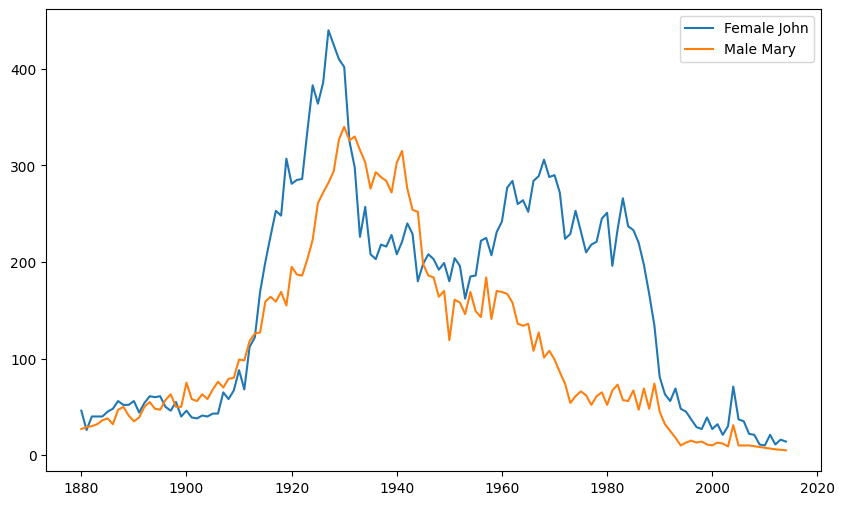

In [45]:
import matplotlib.pyplot as plt

john_female = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))
plt.plot(john_female.index, john_female.values, label='Female John')
plt.plot(mary_male.index, mary_male.values, label='Male Mary')
plt.legend()
plt.show()
